In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
df = pd.read_csv("Admission_predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
from sklearn.preprocessing import Binarizer 
bi = Binarizer( threshold = 0.75 )
df['Chance of Admit'] = bi.fit_transform(df[['Chance of Admit']])

In [6]:
y = df['Chance of Admit']
x = df.drop('Chance of Admit', axis = 1 )
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [7]:
y = y.astype(int)
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Chance of Admit, dtype: int32

<Axes: xlabel='Chance of Admit', ylabel='count'>

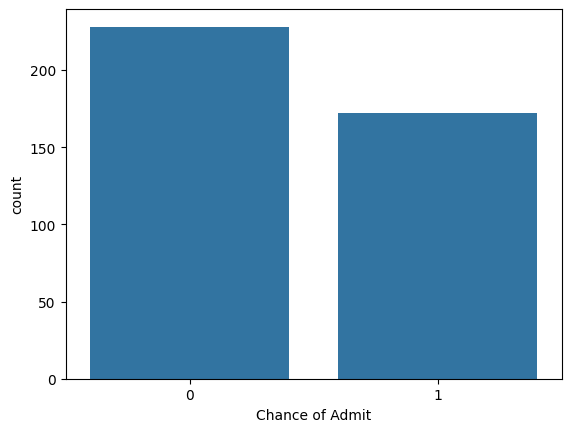

In [8]:
sns.countplot(x = y)

In [9]:
y.value_counts()

0    228
1    172
Name: Chance of Admit, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( x , y , test_size = 0.25 , random_state = 40 )

In [11]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier ( random_state = 40 )
classifier.fit(x_train,y_train)
y_pred = classifier.predict( x_test )

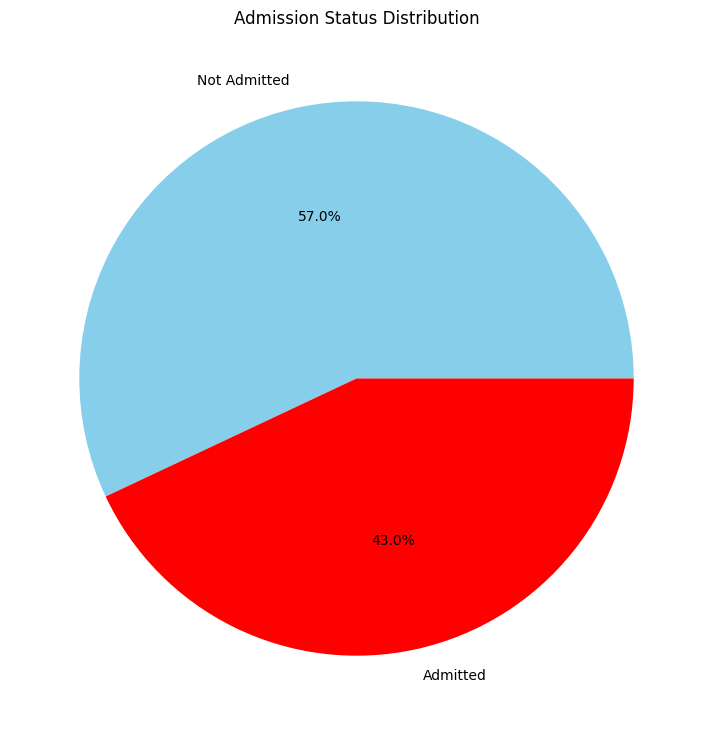

In [12]:
plt.figure( figsize=(16,9) )
count = y.value_counts()
plt.pie(count, labels=['Not Admitted', 'Admitted'], autopct='%1.1f%%', colors=['skyblue', 'red'])
plt.title('Admission Status Distribution')
plt.show()

In [13]:
result = pd.DataFrame ( { 'actual' : y_test , 'predicted' : y_pred } )
result.head()

,actual,predicted
132,0,0
390,0,0
310,1,0
3,1,0
248,1,1


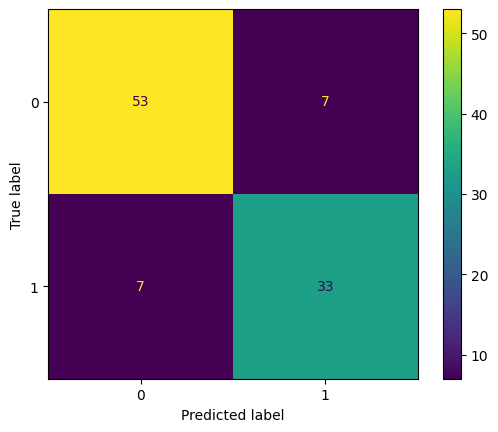

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay , classification_report , accuracy_score
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [23]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# # Instantiate and train the model
# clf = LogisticRegression()
# clf.fit(x_train, y_train)

# # Predict on the test data
# y_pred = clf.predict(x_test)

# # Display the confusion matrix
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# # Print the classification report
# print(classification_report(y_test, y_pred))

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        60
           1       0.89      0.78      0.83        40

    accuracy                           0.87       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.87      0.87      0.87       100



In [17]:
accuracy_score(y_test,y_pred)

0.87

In [18]:
new = [[3, 316, 104, 3, 3.0, 3.5, 8.00, 1]]
classifier.predict(new)[0] 

C:\Users\Kiran Navale\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0

[Text(0.673828125, 0.95, 'CGPA <= 8.855\ngini = 0.493\nsamples = 300\nvalue = [168.0, 132.0]\nclass = NA'),
 Text(0.47265625, 0.85, 'CGPA <= 8.63\ngini = 0.263\nsamples = 193\nvalue = [163, 30]\nclass = NA'),
 Text(0.5732421875, 0.8999999999999999, 'True  '),
 Text(0.3359375, 0.75, 'LOR <= 4.25\ngini = 0.135\nsamples = 151\nvalue = [140, 11]\nclass = NA'),
 Text(0.234375, 0.65, 'GRE Score <= 319.5\ngini = 0.104\nsamples = 146\nvalue = [138, 8]\nclass = NA'),
 Text(0.125, 0.55, 'SOP <= 4.75\ngini = 0.046\nsamples = 128\nvalue = [125, 3]\nclass = NA'),
 Text(0.0625, 0.45, 'Research <= 0.5\ngini = 0.031\nsamples = 126\nvalue = [124, 2]\nclass = NA'),
 Text(0.03125, 0.35, 'gini = 0.0\nsamples = 95\nvalue = [95, 0]\nclass = NA'),
 Text(0.09375, 0.35, 'CGPA <= 8.24\ngini = 0.121\nsamples = 31\nvalue = [29, 2]\nclass = NA'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = NA'),
 Text(0.125, 0.25, 'GRE Score <= 307.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass =

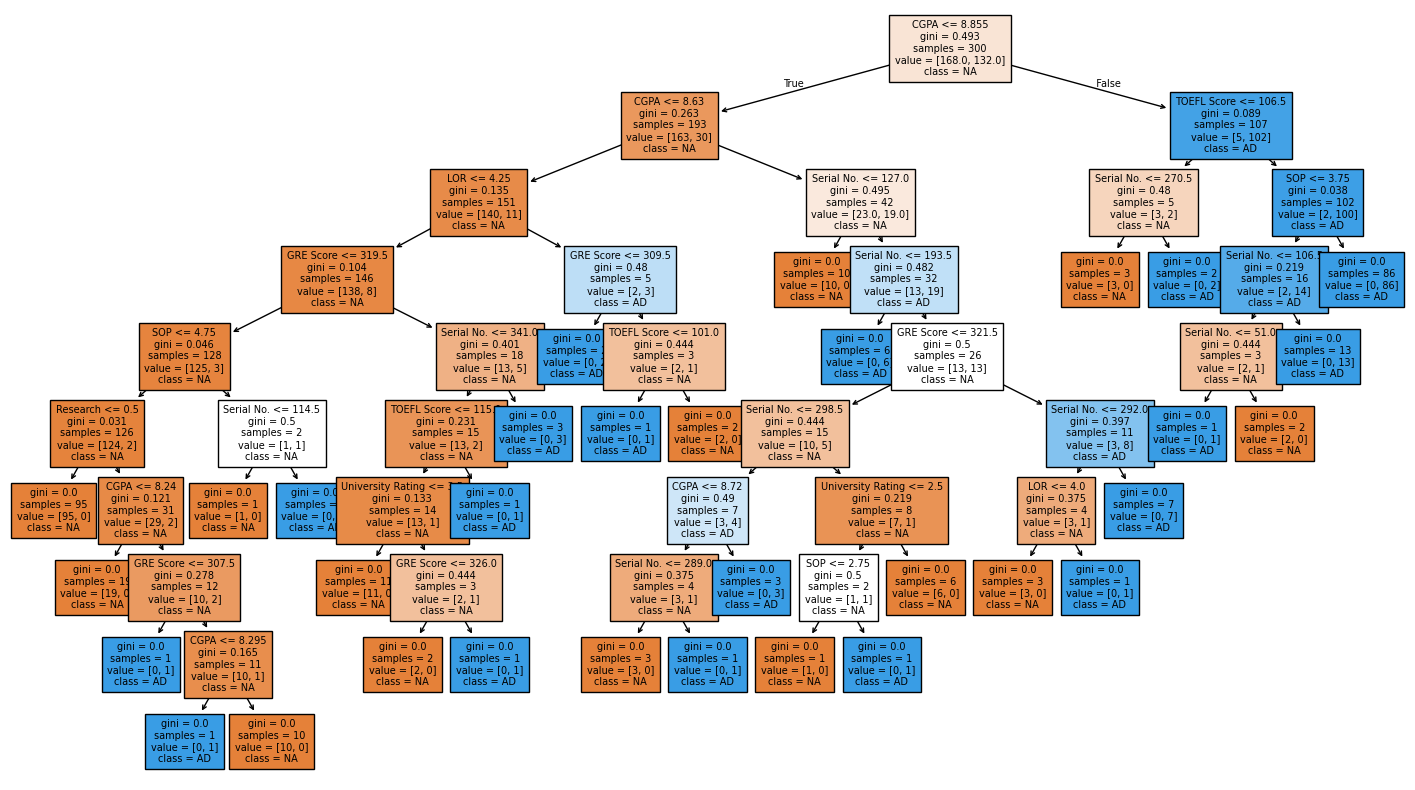

In [19]:
plt.figure( figsize=(18,10) )
from sklearn.tree import plot_tree
plot_tree(classifier,filled=True,fontsize=7,feature_names=x.columns,class_names=['NA','AD'])

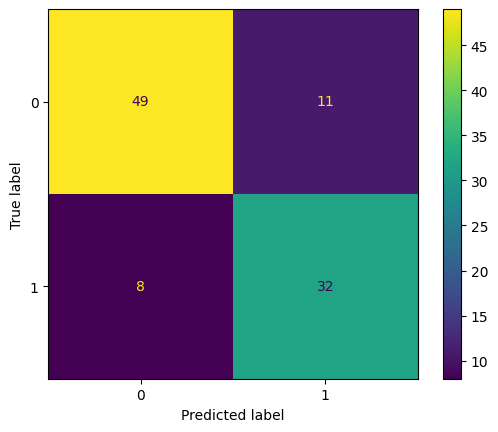

In [20]:
cle_en =DecisionTreeClassifier(criterion ='entropy',random_state=0)
cle_en.fit(x_train,y_train)
y_pred = cle_en.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [21]:
accuracy_score(y_test,y_pred)

0.81

[Text(0.5819672131147541, 0.9545454545454546, 'CGPA <= 8.855\nentropy = 0.99\nsamples = 300\nvalue = [168.0, 132.0]\nclass = NA'),
 Text(0.32786885245901637, 0.8636363636363636, 'CGPA <= 8.25\nentropy = 0.623\nsamples = 193\nvalue = [163, 30]\nclass = NA'),
 Text(0.45491803278688525, 0.9090909090909092, 'True  '),
 Text(0.21311475409836064, 0.7727272727272727, 'GRE Score <= 329.0\nentropy = 0.092\nsamples = 85\nvalue = [84, 1]\nclass = NA'),
 Text(0.18032786885245902, 0.6818181818181818, 'entropy = 0.0\nsamples = 84\nvalue = [84, 0]\nclass = NA'),
 Text(0.2459016393442623, 0.6818181818181818, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = AD'),
 Text(0.4426229508196721, 0.7727272727272727, 'CGPA <= 8.63\nentropy = 0.839\nsamples = 108\nvalue = [79.0, 29.0]\nclass = NA'),
 Text(0.3114754098360656, 0.6818181818181818, 'LOR <= 4.25\nentropy = 0.614\nsamples = 66\nvalue = [56, 10]\nclass = NA'),
 Text(0.22950819672131148, 0.5909090909090909, 'Serial No. <= 350.5\nentropy = 0.514\nsam

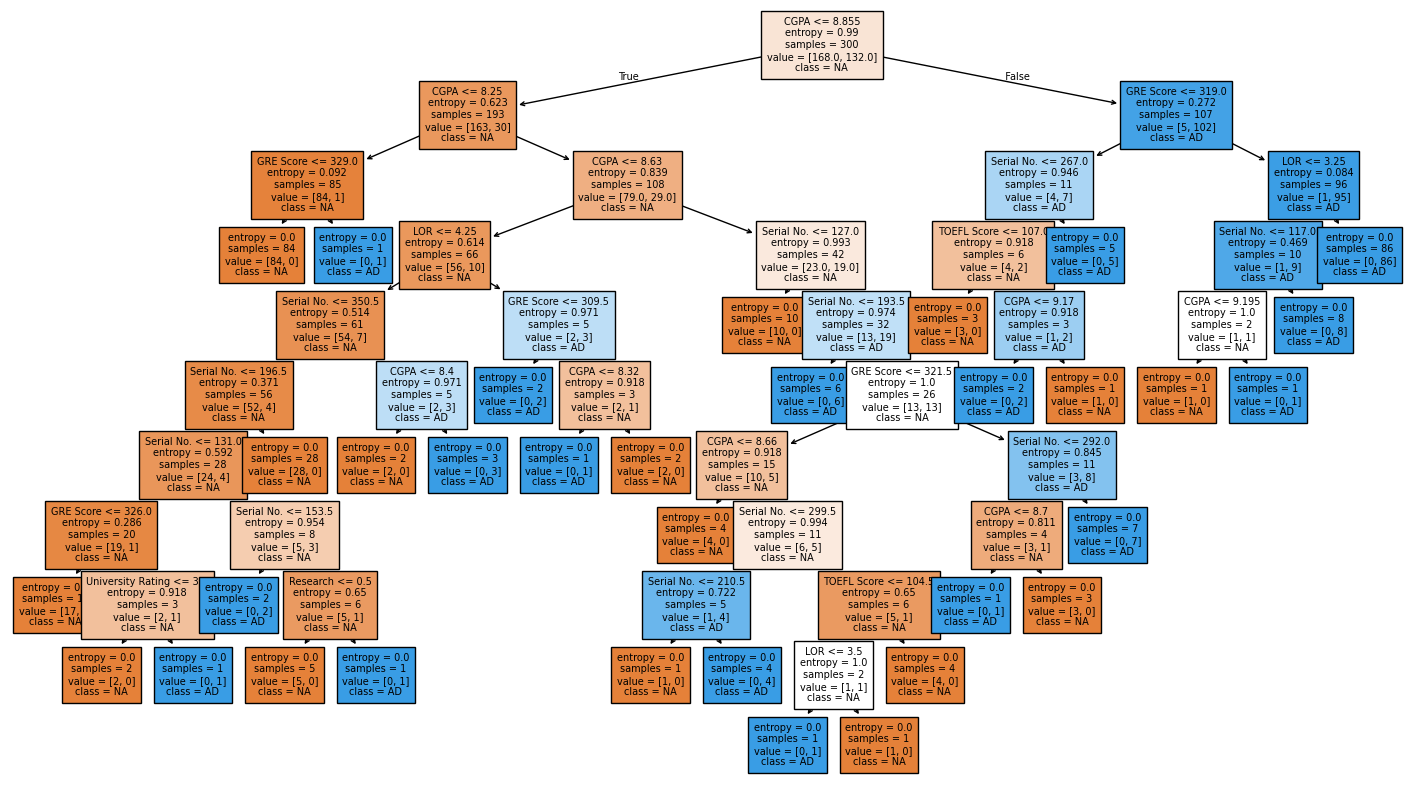

In [22]:
plt.figure( figsize=(18,10) )
plot_tree(cle_en,filled=True,fontsize=7,feature_names=x.columns,class_names=['NA','AD'])